In [1]:
import tensorflow as tf

C:\Users\theda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
sample = mnist.train.images[2034].reshape(28,28)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

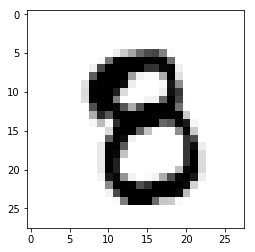

In [8]:
plt.imshow(sample,cmap='Greys')

In [9]:
#Parameters

In [10]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [11]:
n_classes = 10
n_sample = mnist.train.num_examples

In [12]:
n_input = 784

In [13]:
n_hidden_1 = 256
n_hidden_2 = 256

In [14]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    #First Hidden Layer with RELU Activation
    #X times weight plus bias
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #Passing above stuff into a function = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [15]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [16]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [17]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [18]:
x = tf.placeholder('float',[None, n_input])

In [19]:
y = tf.placeholder('float',[None, n_classes])

In [20]:
pred = multilayer_perceptron(x,weights,biases)

In [21]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [22]:
#PART 3

In [23]:
t = mnist.train.next_batch(10)

In [27]:
len(t)

2

In [32]:
xsamp, ysamp = t

In [33]:
ysamp

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
#Run the Session

In [35]:
sess = tf.InteractiveSession()

In [36]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [37]:
sess.run(init)

In [40]:
#15 loops
for epoch in range(training_epochs):
    
    #Cost
    avg_cost = 0.0
    
    total_batch = int(n_sample/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1,avg_cost))
    
print("Model has completed{} Epochs of training".format(training_epochs))

Epoch: 1 cost150.7828
Epoch: 2 cost40.2412
Epoch: 3 cost25.2895
Epoch: 4 cost17.8823
Epoch: 5 cost13.0582
Epoch: 6 cost9.7786
Epoch: 7 cost7.2843
Epoch: 8 cost5.5070
Epoch: 9 cost4.1054
Epoch: 10 cost3.0779
Epoch: 11 cost2.2998
Epoch: 12 cost1.7867
Epoch: 13 cost1.2704
Epoch: 14 cost1.1391
Epoch: 15 cost0.8007
Model has completed15 Epochs of training


In [41]:
#Model Evaluations

In [43]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [44]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [45]:
correct_predictions = tf.cast(correct_predictions,'float')

In [46]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [47]:
accuracy = tf.reduce_mean(correct_predictions)

In [48]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [50]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [53]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.946